# Error Analysis

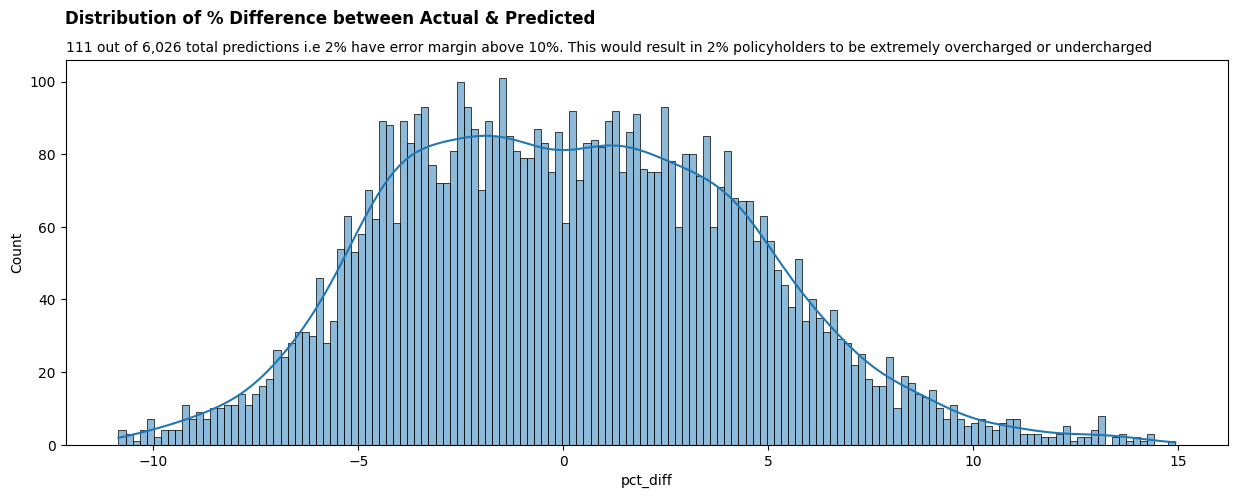

In [1]:
# Importing data science libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import joblib

# Loading processed
df = pd.read_excel('D:/[01] SKILLS/[00] Projects/01 Healthcare Premium Prediction/data/processed/processed_premiums_data_young.xlsx')
df.head()

# Split the data into X (input features) & y (target features)
X = df.drop(columns= ['annual_premium_amount'], axis= 1)
y = df['annual_premium_amount']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state= 69, shuffle= True)

# Developing XGBoost Regression Model
model = joblib.load(filename= 'D:/[01] SKILLS/[00] Projects/01 Healthcare Premium Prediction/models/model_young.joblib')
y_pred = model.predict(X_test)

# Creating a comparision table
results_comparision_df = pd.DataFrame(
    data= {
        'actual': y_test,
        'predicted': y_pred,
        'residuals': (y_pred - y_test),
        'pct_diff': ((y_pred - y_test) / y_test) * 100
    }
)

# Calculating % of extreme errors w.r.t. SoW
extreme_error_threshold = 10
extreme_error_df = results_comparision_df[abs(results_comparision_df['pct_diff']) > extreme_error_threshold ]

total_predictions = results_comparision_df.shape[0]
total_extreme_error_predictions= extreme_error_df.shape[0]

extreme_error_pct = total_extreme_error_predictions / total_predictions * 100

# Visualizing the distribution
plt.figure(figsize= (15,5))
sns.histplot(
    results_comparision_df['pct_diff'],
    kde= True,
    bins= 150
)

plt.suptitle('Distribution of % Difference between Actual & Predicted', ha= 'right', x= 0.478, fontweight= 'bold')
plt.title(
f'{total_extreme_error_predictions:,} out of {total_predictions:,} total predictions i.e {extreme_error_pct:.0f}% have error margin above {extreme_error_threshold}%. ' 
f'This would result in {extreme_error_pct:.0f}% policyholders to be extremely overcharged or undercharged',
x=0.0, ha='left', fontsize=10
)

plt.show()

# Comparing distribution of overall records and extreme error records

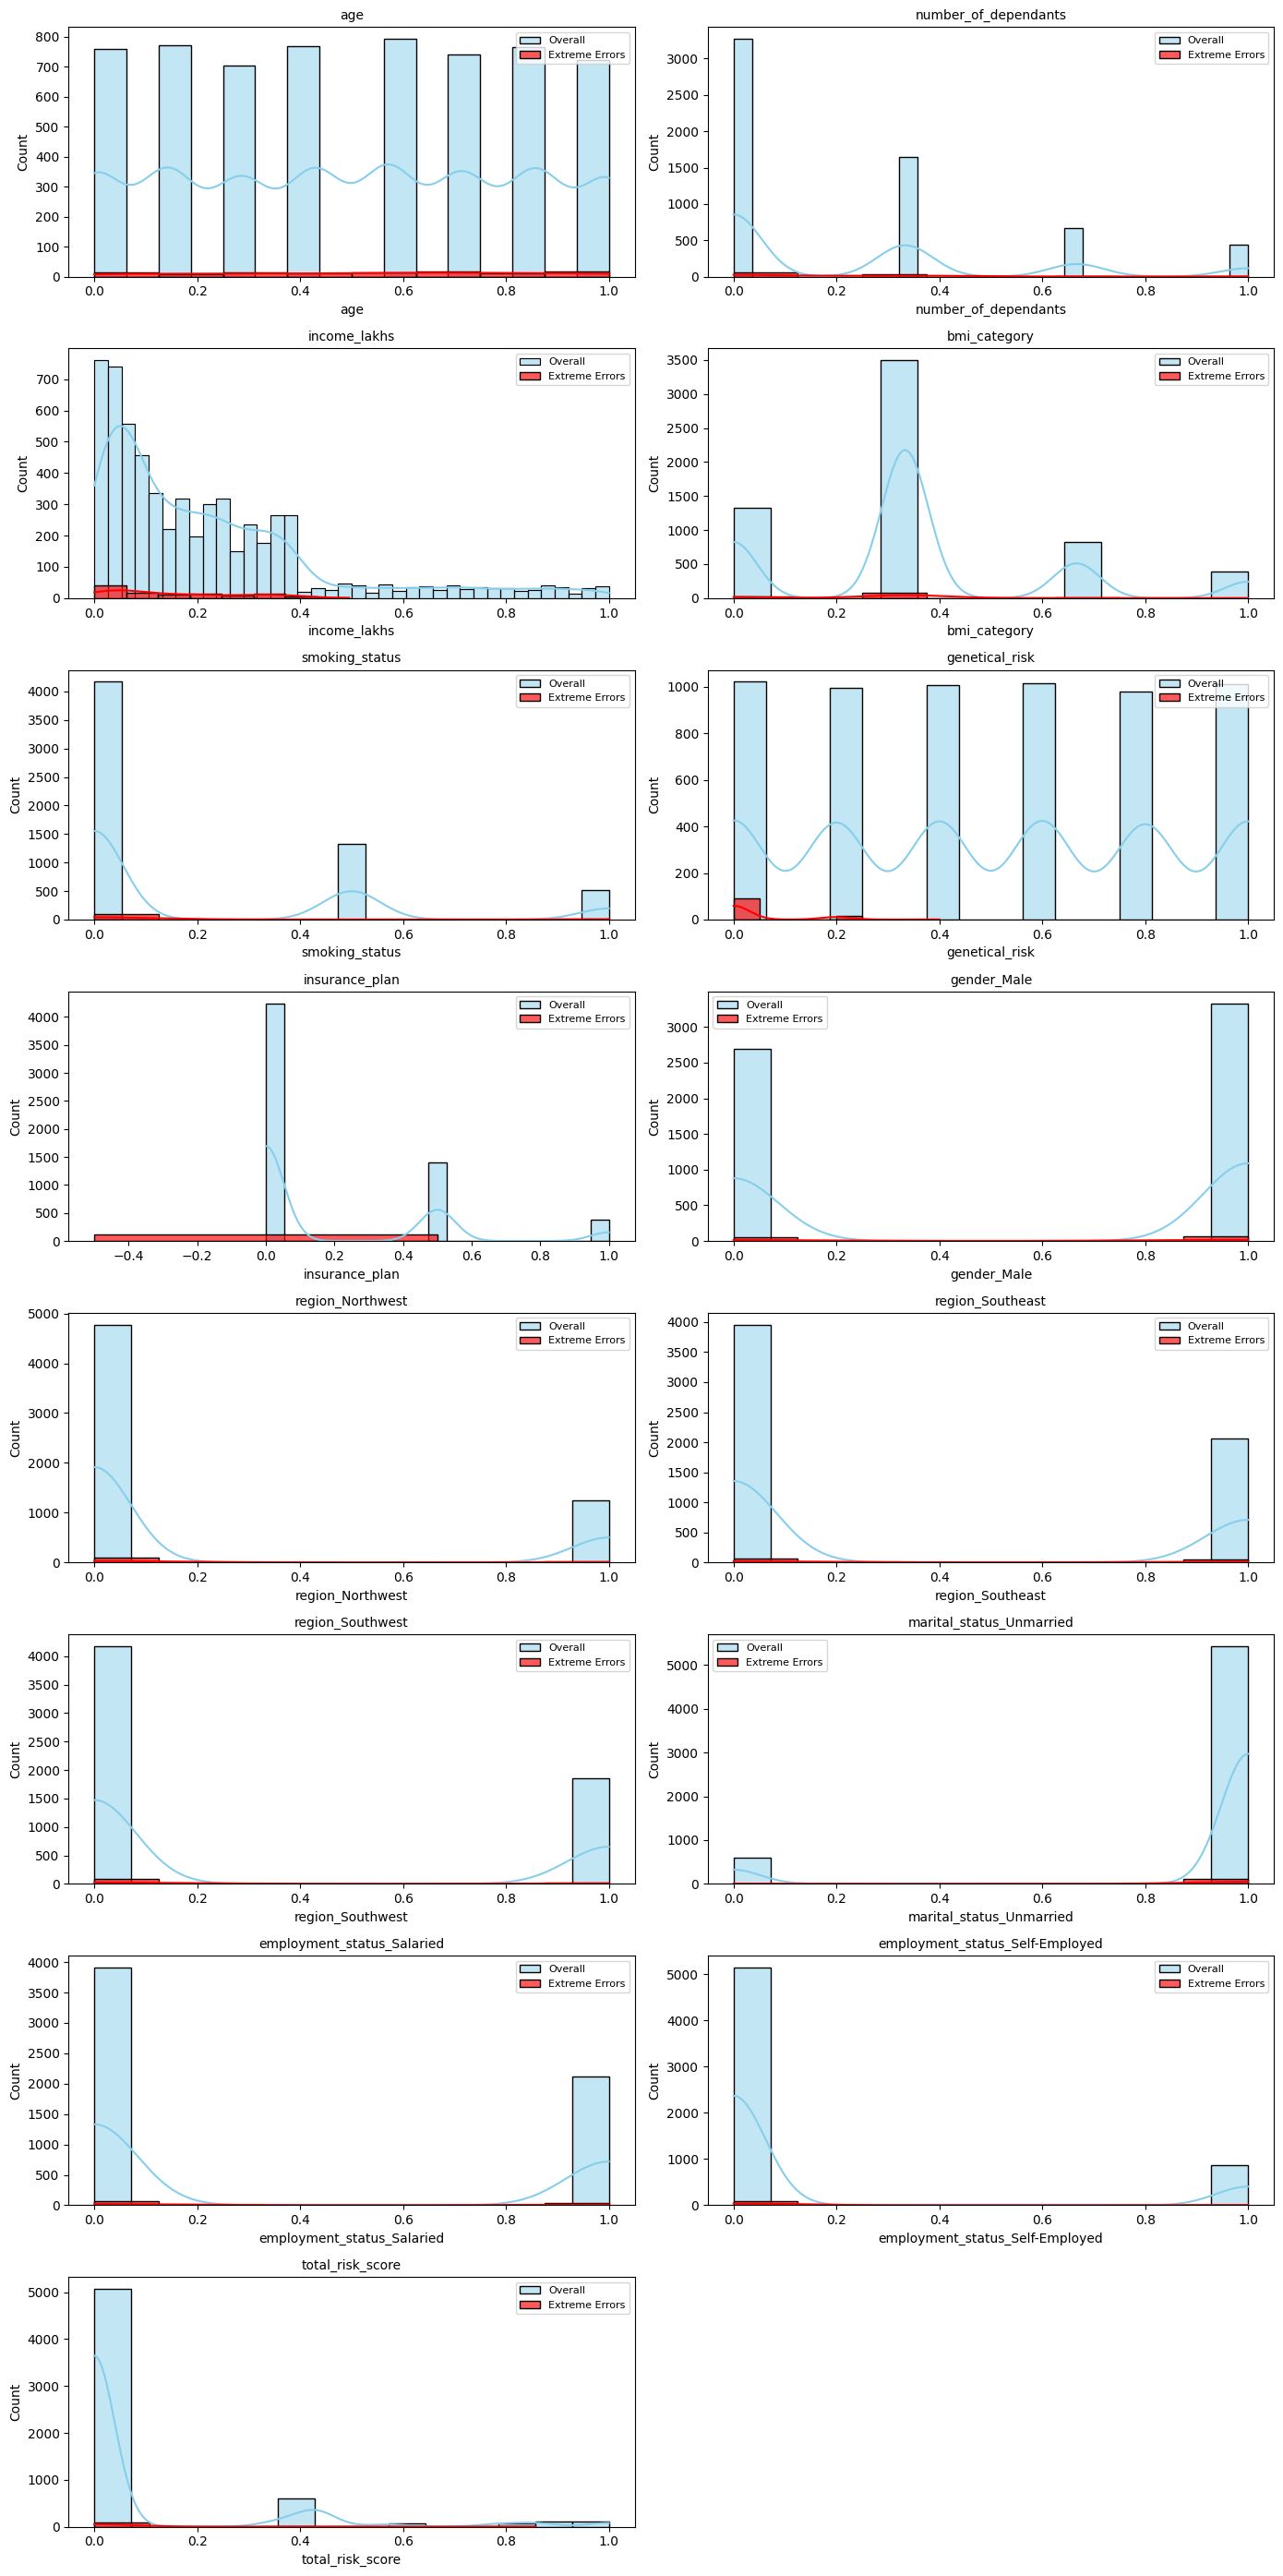

In [2]:
# Segmenting extreme error records from X Test dataframe
extreme_error_records = X_test.loc[extreme_error_df.index]

# Visualizing distribution of normal records and extreme error records
n_features = len(X_test.columns)
n_cols = 2
n_rows = int(np.ceil(n_features / n_cols))

fig, axes = plt.subplots(n_rows, n_cols, figsize=(14, 3.5 * n_rows), sharex=False)
axes = axes.flatten()

# Plot each feature
for i, feature in enumerate(X_test.columns):
    ax = axes[i]
    
    sns.histplot(x=X_test[feature], kde=True, color='skyblue', label='Overall', ax=ax)
    sns.histplot(x=extreme_error_records[feature], kde=True, alpha=0.65, color='red', label='Extreme Errors', ax=ax)
    
    ax.set_title(f'{feature}', fontsize=10)
    ax.legend(fontsize=8)
    # ax.tick_params(axis='both', labelsize=8)

# Remove unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()
